<a href="https://colab.research.google.com/github/Ritanjit/MNIST_Digit_Classification_MLP_CNN/blob/main/TensorFlow_MNIST_Digit_Classification_MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digit Classification using MLP and CNN**


*This project implements two deep learning models for handwritten digit classification:*

*1. Multi-Layer Perceptron (MLP)*

*2. Convolutional Neural Network (CNN)*

---

# 1. Importing Libraries and Load Dataset

In [ ]:
# Imports
%pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("\nDataset Information:")
print(f"Training data shape: {x_train.shape}")  # (60000, 28, 28)
print(f"Test data shape: {x_test.shape}")        # (10000, 28, 28)
print(f"Unique labels: {np.unique(y_train)}")    # 0-9 digits

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Dataset Information:
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


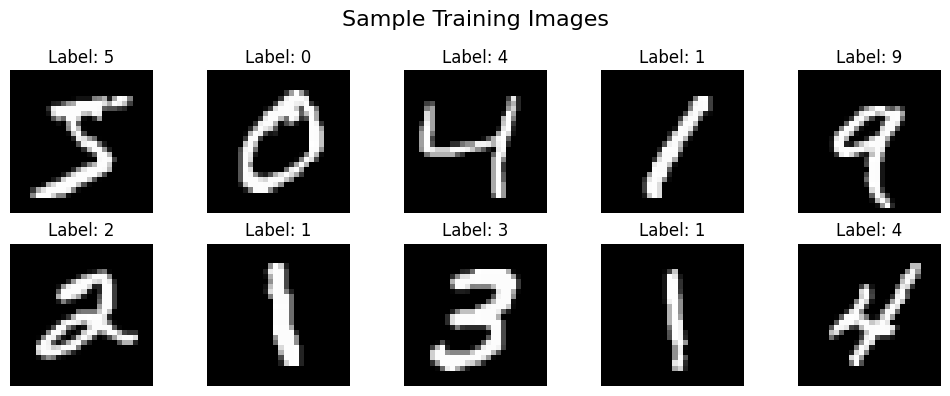

In [ ]:
# dataset visualization
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle('Sample Training Images', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Data Preprocessing for MLP

In [ ]:
# Normalize pixel values to [0, 1]
x_train_mlp = x_train.astype('float32') / 255.0
x_test_mlp = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("\nMLP Preprocessing:")
print(f"Training labels shape: {y_train_cat.shape}")  # (60000, 10)
print(f"Test labels shape: {y_test_cat.shape}")       # (10000, 10)


MLP Preprocessing:
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


# 3. MLP Model Definition and Training

In [ ]:
# Build MLP architecture
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),      # Convert 28x28 image to 784-dimensional vector
    Dense(256, activation='relu'),      # Hidden layer with 256 neurons
    Dropout(0.3),                       # Regularization to prevent overfitting
    Dense(128, activation='relu'),      # Hidden layer with 128 neurons
    Dense(10, activation='softmax')     # Output layer with 10 classes
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nMLP Model Architecture:")
mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



MLP Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train MLP model
print("\nTraining MLP Model...")
history_mlp = mlp_model.fit(
    x_train_mlp, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Training MLP Model...
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8423 - loss: 0.5235 - val_accuracy: 0.9710 - val_loss: 0.0986
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9566 - loss: 0.1403 - val_accuracy: 0.9730 - val_loss: 0.0879
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9686 - loss: 0.1004 - val_accuracy: 0.9760 - val_loss: 0.0840
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9730 - loss: 0.0869 - val_accuracy: 0.9763 - val_loss: 0.0757
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9787 - loss: 0.0670 - val_accuracy: 0.9758 - val_loss: 0.0771
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9803 - loss: 0.0611 - val_accuracy: 0.9827 - val_loss: 0.0622
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9810 - val_loss: 0.0706
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9825 - loss: 0.

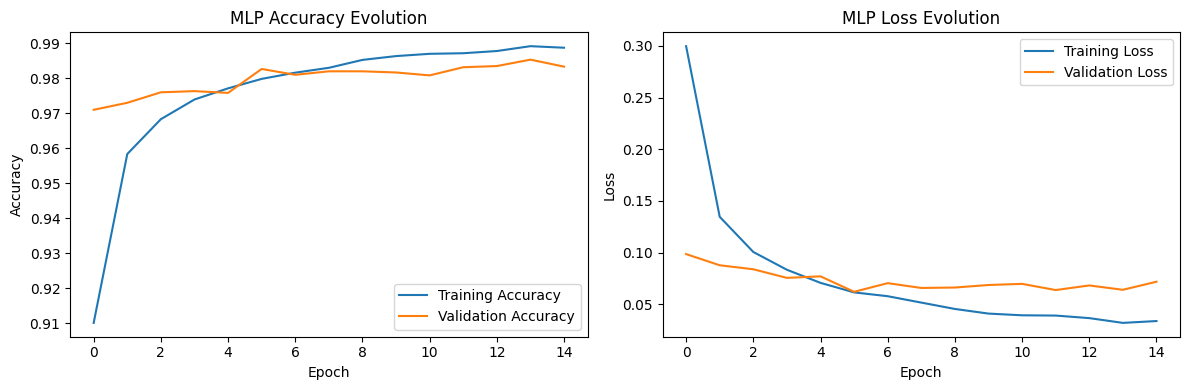

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Data Preprocessing for CNN

In [ ]:
# Reshape data for CNN input (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print("\nCNN Preprocessing:")
print(f"CNN Training shape: {x_train_cnn.shape}")  # (60000, 28, 28, 1)
print(f"CNN Test shape: {x_test_cnn.shape}")       # (10000, 28, 28, 1)


CNN Preprocessing:
CNN Training shape: (60000, 28, 28, 1)
CNN Test shape: (10000, 28, 28, 1)


# 6. CNN Model Definition and Training

In [ ]:
# Build CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Feature extraction
    MaxPooling2D((2, 2)),                                             # Spatial downsampling
    Conv2D(64, (3, 3), activation='relu'),                            # Higher-level features
    MaxPooling2D((2, 2)),
    Flatten(),                                                         # Prepare for dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),                                                      # Combat overfitting
    Dense(10, activation='softmax')                                    # Classification layer
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nCNN Model Architecture:")
cnn_model.summary()


CNN Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train CNN model
print("\nTraining CNN Model...")
history_cnn = cnn_model.fit(
    x_train_cnn, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Training CNN Model...
Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8261 - loss: 0.5458 - val_accuracy: 0.9845 - val_loss: 0.0539
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9705 - loss: 0.0995 - val_accuracy: 0.9870 - val_loss: 0.0438
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9791 - loss: 0.0703 - val_accuracy: 0.9895 - val_loss: 0.0416
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9829 - loss: 0.0554 - val_accuracy: 0.9907 - val_loss: 0.0331
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0482 - val_accuracy: 0.9908 - val_loss: 0.0300
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9879 - loss: 0.0390 - val_accuracy: 0.9915 - val_loss: 0.0345
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9922 - val_loss: 0.0308
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9900 - loss: 0

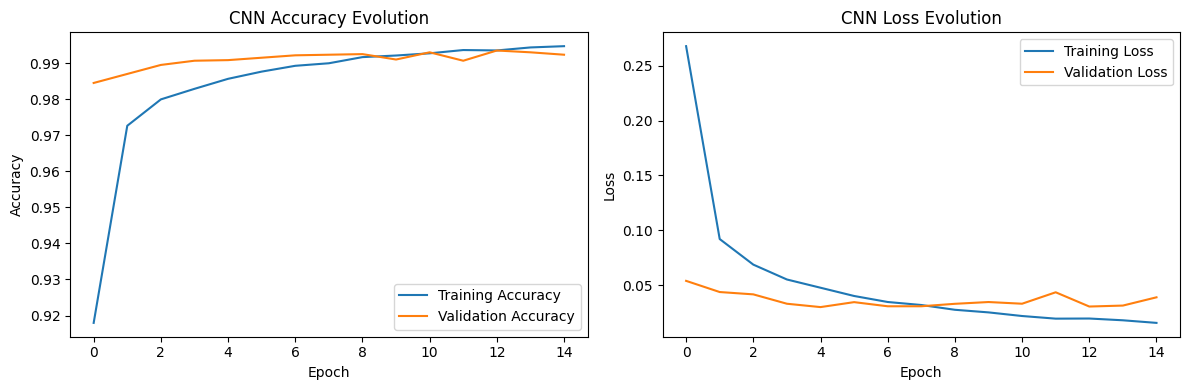

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# 7. CNN Model Evaluation

In [ ]:
# Evaluate CNN performance
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_acc:.4f} | Test Loss: {cnn_loss:.4f}")


CNN Test Accuracy: 0.9930 | Test Loss: 0.0267


In [ ]:
# Generate predictions and visualize results
cnn_predictions = cnn_model.predict(x_test_cnn)
cnn_classes = np.argmax(cnn_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


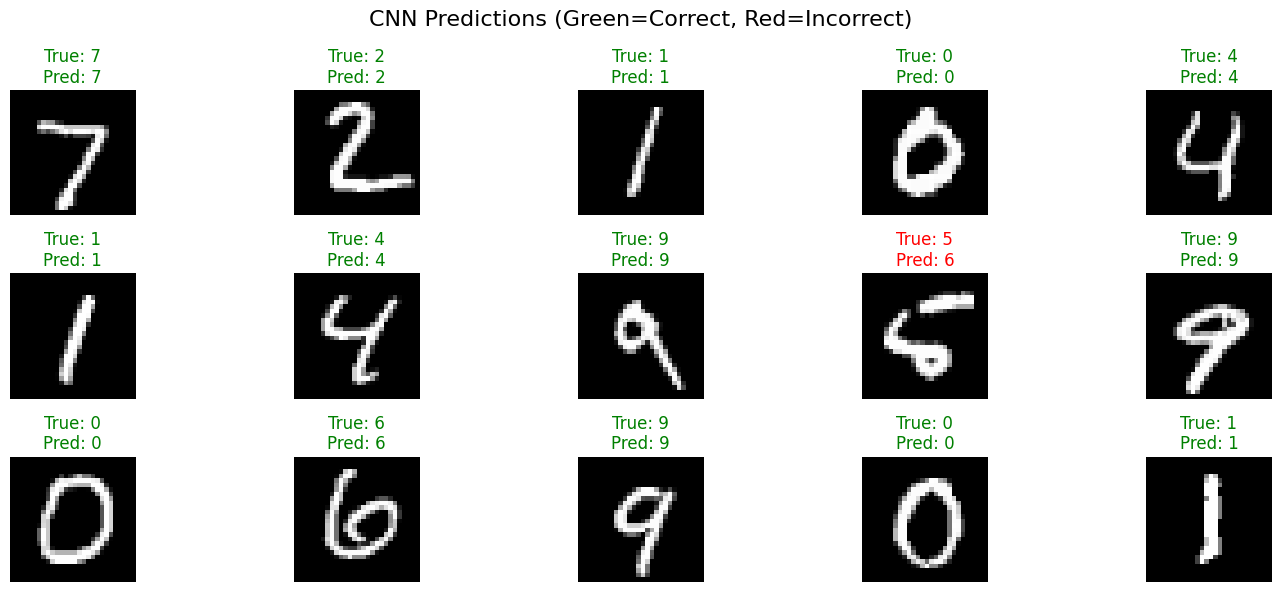

In [ ]:
# Display sample predictions
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {cnn_classes[i]}",
              color='green' if y_test[i] == cnn_classes[i] else 'red')
    plt.axis('off')
plt.suptitle('CNN Predictions (Green=Correct, Red=Incorrect)', fontsize=16)
plt.tight_layout()
plt.show()

# 8. Comparative Analysis

In [ ]:
# Performance comparison table
print("\nModel Performance Comparison:")
print("-" * 35)
# Evaluate MLP performance
mlp_loss, mlp_acc = mlp_model.evaluate(x_test_mlp, y_test_cat, verbose=0)
print(f"\nMLP Test Accuracy: {mlp_acc:.4f} | Test Loss: {mlp_loss:.4f}")
# Evaluate CNN performance
print(f"\nCNN Test Accuracy: {cnn_acc:.4f} | Test Loss: {cnn_loss:.4f}")


Model Performance Comparison:
-----------------------------------

MLP Test Accuracy: 0.9822 | Test Loss: 0.0667

CNN Test Accuracy: 0.9930 | Test Loss: 0.0267


In [ ]:
# Error analysis visualization
mlp_predictions = mlp_model.predict(x_test_mlp)
predicted_classes = np.argmax(mlp_predictions, axis=1)

mlp_errors = np.where(y_test != predicted_classes)[0]
cnn_errors = np.where(y_test != cnn_classes)[0]

print(f"\nError Analysis:")
print(f"MLP misclassified samples: {len(mlp_errors)}/{len(x_test)} ({len(mlp_errors)/len(x_test):.2%})")
print(f"CNN misclassified samples: {len(cnn_errors)}/{len(x_test)} ({len(cnn_errors)/len(x_test):.2%})")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Error Analysis:
MLP misclassified samples: 178/10000 (1.78%)
CNN misclassified samples: 70/10000 (0.70%)


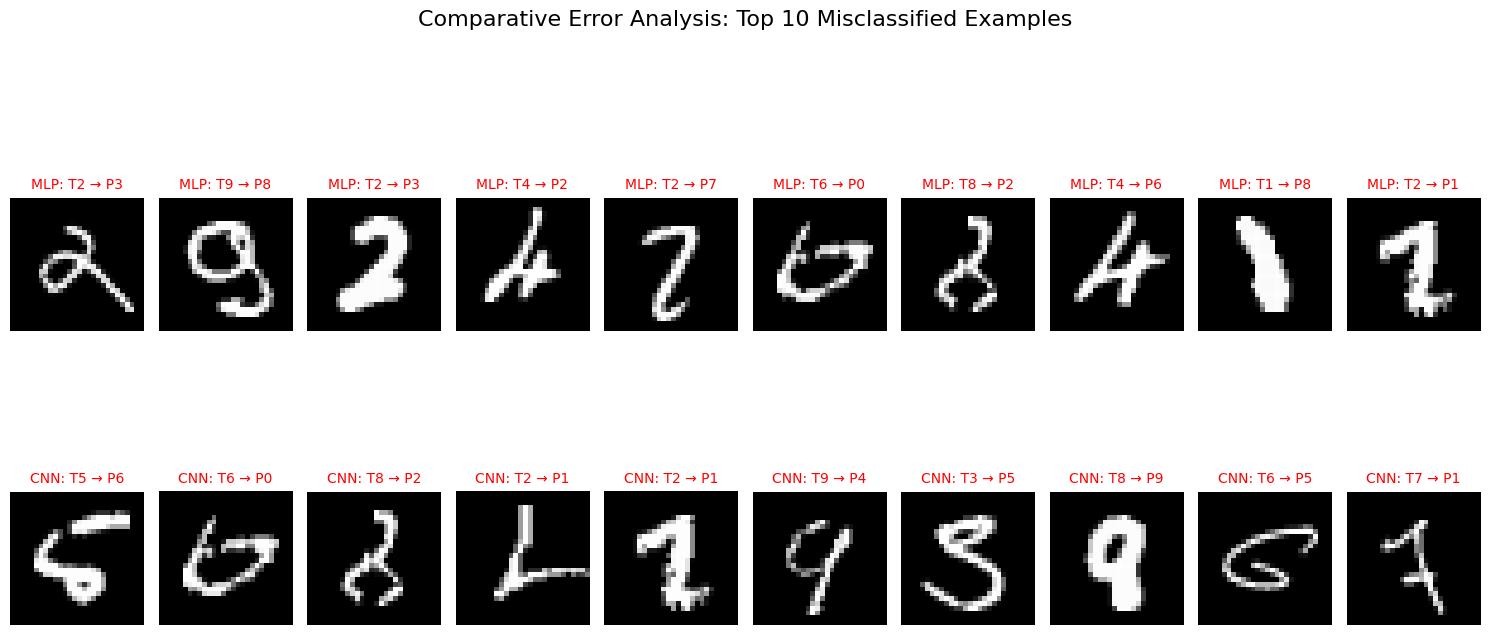

In [ ]:
# Visualize common errors
plt.figure(figsize=(15, 8))
for i in range(10):

    # MLP errors
    plt.subplot(2, 10, i+1)
    idx = mlp_errors[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"MLP: T{y_test[idx]} → P{predicted_classes[idx]}", fontsize=10, color='red')
    plt.axis('off')

    # CNN errors
    plt.subplot(2, 10, i+11)
    idx = cnn_errors[i] if i < len(cnn_errors) else cnn_errors[0]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"CNN: T{y_test[idx]} → P{cnn_classes[idx]}", fontsize=10, color='red')
    plt.axis('off')

plt.suptitle('Comparative Error Analysis: Top 10 Misclassified Examples', fontsize=16)
plt.tight_layout()
plt.show()